# DBSCAN

The DBSCAN algorithm as described in the README.md file will also be used to categorize countries and their economic health along with their development, like k-means clustering. Again, I will use two socioeconomic metrics, GDP per capital and life expectancy. For the DBSCAN implementation, I will be using the DBSCAN algorithm in scikit-learn and analyze how these cluster compare to k-means clustering. We are able to tell what points this algorithm labels as outliers or noise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read csv file with all country transit and socioeconomic data
df = pd.read_csv("Data/HDIData.csv")

In [3]:
# clean up data file

# isolate the following features:
#		Unemployment, total (% of total labor force)
#		Life expectancy at birth, female (years)

row_ind = [1463, 763]
col_filled = ~df.loc[row_ind].isin([".."]).any() # only keep countries with nonempty rows

fil_df = df.loc[row_ind, col_filled] # create new data table with isolated rows
fil_df.head()

,Time,Time Code,Series Name,Series Code,Argentina [ARG],Australia [AUS],Brazil [BRA],China [CHN],France [FRA],Germany [DEU],...,Uganda [UGA],Ukraine [UKR],United Arab Emirates [ARE],Uruguay [URY],Uzbekistan [UZB],Vanuatu [VUT],Viet Nam [VNM],West Bank and Gaza [PSE],Zambia [ZMB],Zimbabwe [ZWE]
1463,2019,YR2019,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,9.843,5.143,11.936,5.15,8.415,3.163,...,2.563,8.194,2.331,8.836,8.98,5.445,1.681,25.34,5.538,7.373
763,2019,YR2019,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,79.439,85,79.023,80.747,85.9,83.7,...,69.13,78.73,84.047,81.293,75.374,73.292,78.972,78.092,65.44,63.049


In [4]:
# transform data file and delete time/labels for correlations
df_transposed = fil_df.T
df_transposed.columns = df_transposed.iloc[2]
df_kmeans = df_transposed.iloc[4:,:]
df_kmeans = df_kmeans.astype(float)

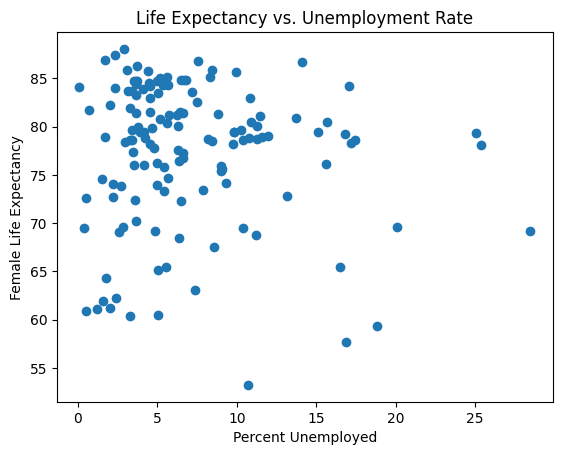

In [5]:
# graph relationship
plt.figure()
plt.scatter(df_kmeans.iloc[:, 0], df_kmeans.iloc[:, 1])
plt.title ('Life Expectancy vs. Unemployment Rate')
plt.xlabel ('Percent Unemployed')
plt.ylabel ('Female Life Expectancy')
plt.show ()

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

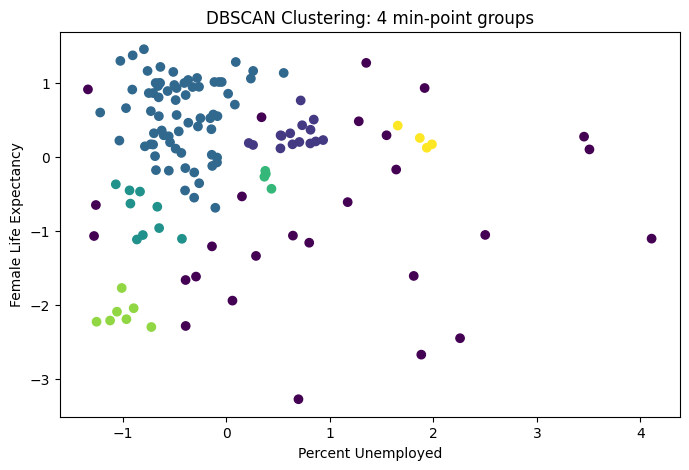

Silhouette Score (excluding noise): 0.38
Estimated number of clusters: 6
Number of noise points: 27


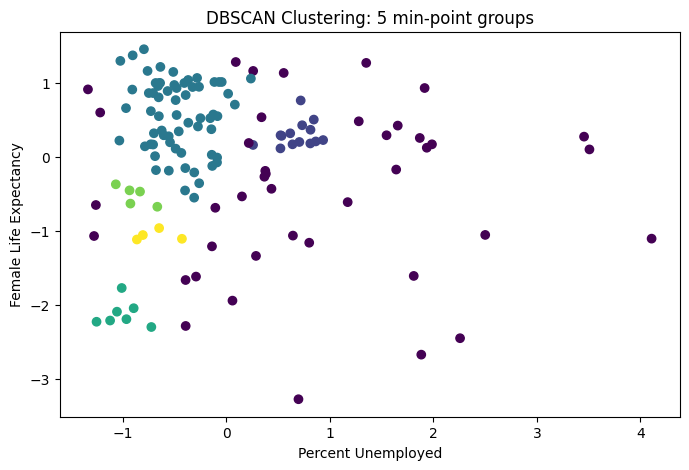

Silhouette Score (excluding noise): 0.40
Estimated number of clusters: 5
Number of noise points: 41


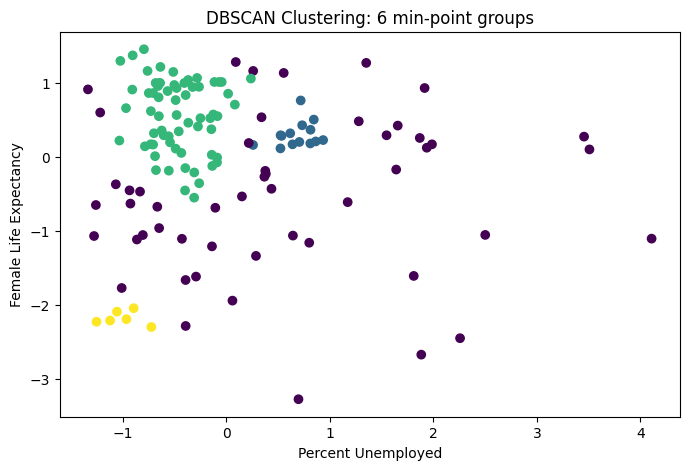

Silhouette Score (excluding noise): 0.51
Estimated number of clusters: 3
Number of noise points: 51


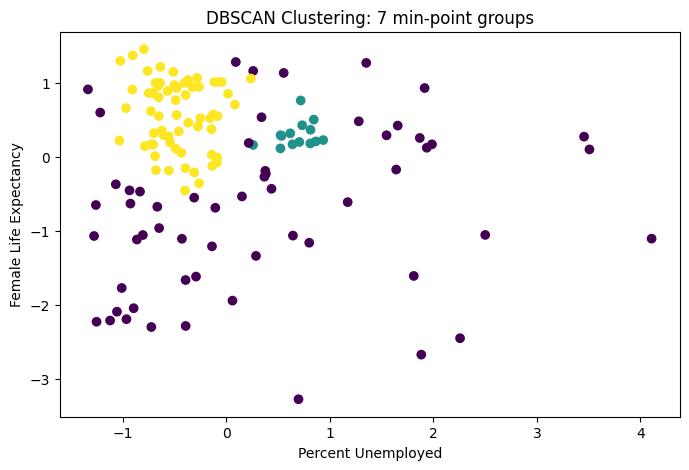

Silhouette Score (excluding noise): 0.49
Estimated number of clusters: 2
Number of noise points: 58


In [7]:
for i in range(4, 8):
	scaler = StandardScaler()
	X_scaled = scaler.fit_transform(df_kmeans)

	# apply DBSCAN
	dbscan = DBSCAN(eps=0.3, min_samples=i)
	labels = dbscan.fit_predict(X_scaled)

	# graph cluster
	plt.figure(figsize=(8, 5))
	plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
	plt.title(f"DBSCAN Clustering: {i} min-point groups")
	plt.xlabel("Percent Unemployed")
	plt.ylabel("Female Life Expectancy")
	plt.show()
	
	# print silhouette score
	filtered_labels = labels[labels != -1]
	filtered_X = X_scaled[labels != -1]
	score = silhouette_score(filtered_X, filtered_labels)
	print(f"Silhouette Score (excluding noise): {score:.2f}")

	# print number of clusters and noise points
	n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
	n_noise = list(labels).count(-1)

	print(f"Estimated number of clusters: {n_clusters}")
	print(f"Number of noise points: {n_noise}")


### Conclusion

Just like with k-means clustering, it is evident that the points on the life expectancy vs. umemployment rate scatter plot can be divided into various clusters with DBSCAN. Again, there is a group of points at the top left that signifies low unemployment and high life expectancy. However, DBSCAN tends to label the points in the lower right corner outliers rather than putting them into a cluster. As the minimum number of points in each cluster gets higher, a large fraction of the points on the plot are labeled outliers.

The silhouette score of DBSCAN clustering with at least 6 points is about the same as 2 clusters with k-means clustering. Due to all the outliers and the mid-range silhouette score, it is further confirmed that this data set may not be that easily separable, or at least there are no distinct categories.